In [ ]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 36 kB/s 
     |████████████████████████████████| 199 kB 56.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=745a5fb4f7ae1d2949f5cc01cfdd9357376456ace1f5de361e49b803905f076b
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df_filepath = "/content/cinemaTicket_Ref.csv"

In [ ]:
df = pd.read_csv(df_filepath, parse_dates = True)

In [ ]:
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [ ]:
# drop rows that has null value
df2 = df.dropna().reset_index(drop = True)
df2.info()

# show the descriptive of the dataset
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142399 entries, 0 to 142398
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142399 non-null  int64  
 1   cinema_code   142399 non-null  int64  
 2   total_sales   142399 non-null  int64  
 3   tickets_sold  142399 non-null  int64  
 4   tickets_out   142399 non-null  int64  
 5   show_time     142399 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142399 non-null  float64
 8   ticket_use    142399 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142399 non-null  object 
 11  month         142399 non-null  int64  
 12  quarter       142399 non-null  int64  
 13  day           142399 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142399.000000,142399.000000,1.423990e+05,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000
mean,1518.989298,320.372369,1.234773e+07,140.177080,0.237389,3.933883,19.965986,81243.435624,139.939691,854.723605,6.777218,2.634864,16.112220
std,36.184162,159.650902,3.063471e+07,279.709174,2.924231,3.056853,22.653445,33237.373278,279.515104,953.118103,2.195050,0.809412,8.948638
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.280000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79459.459459,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.112000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,566.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


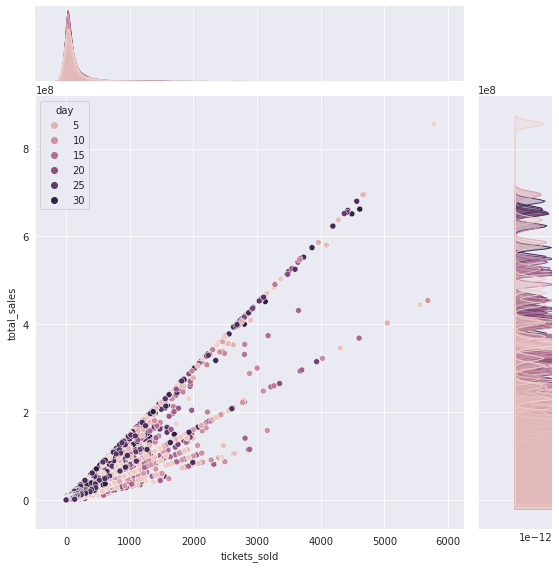

In [ ]:
sns.set_style('darkgrid')
sns.jointplot(x = df2['tickets_sold'], y = df2['total_sales'], hue = df2['day'], height=8, space=0.2, ratio=5)

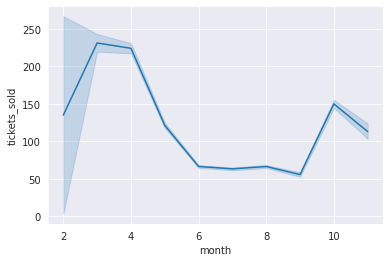

In [ ]:
# monthly report of sold tickets from February to November 2018
sns.set_style('darkgrid')
sns.lineplot(x = 'month', y = 'tickets_sold', data = df2)

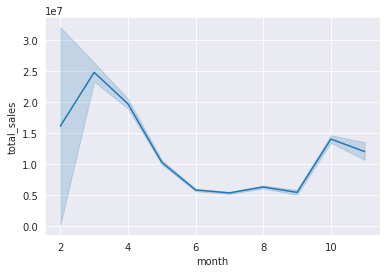

In [ ]:
# monthly report of sales from February to November 2018
sns.set_style('darkgrid')
sns.lineplot(x = 'month', y = 'total_sales', data = df2)

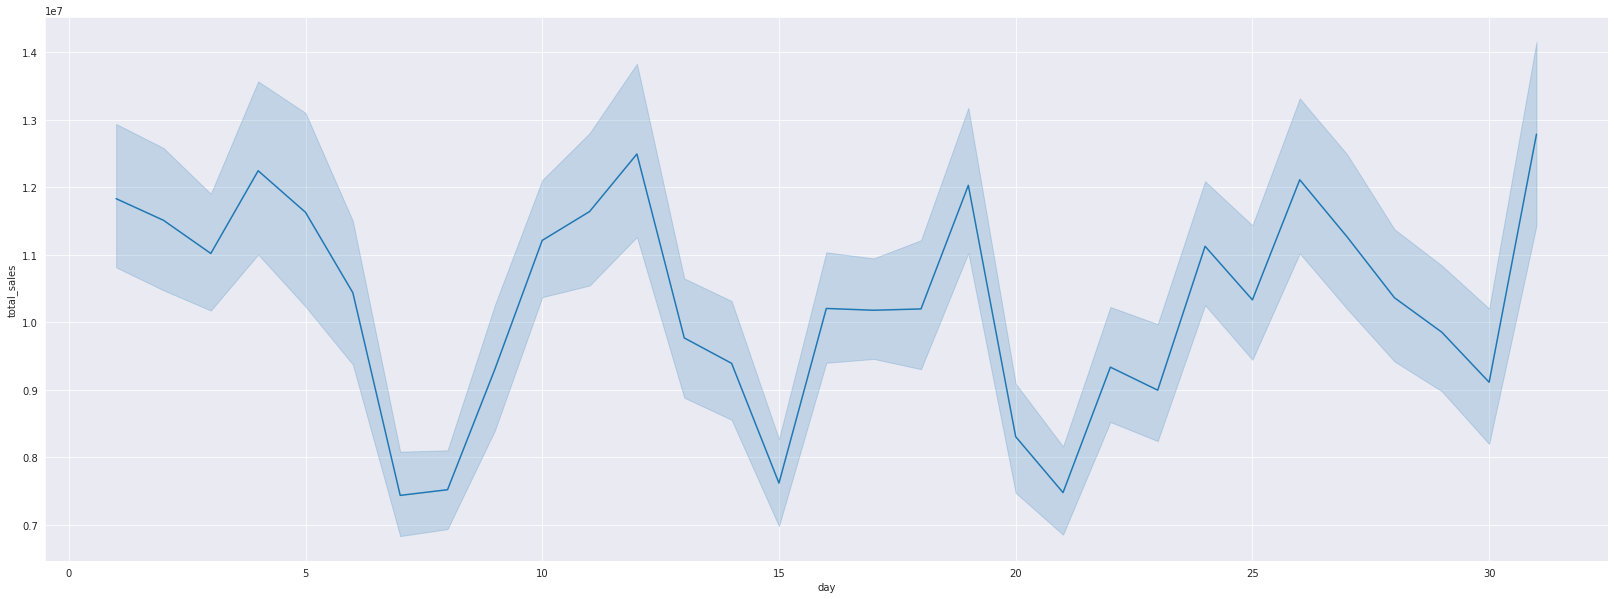

In [ ]:
# sales report of each day of month from February to November 2018
sns.set_style('darkgrid')
plt.figure(figsize = (28, 10))
sns.lineplot(x = 'day', y = 'total_sales', data = df2)